In [5]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
def show(image):
  plt.figure(figsize=(20,10))
  plt.imshow(image, cmap='gray')

In [8]:
original_image = cv.imread('/content/drive/MyDrive/University/Computer Vision/Project/Spoons And Sugar/spoons.png')

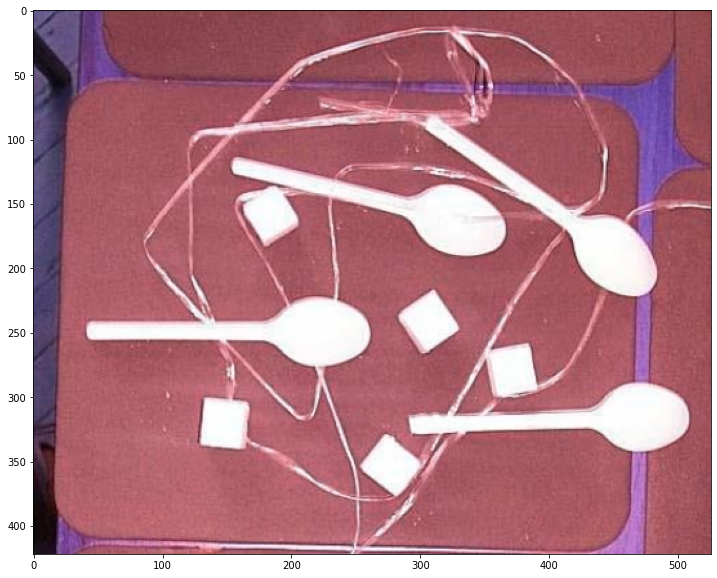

In [9]:
show(original_image)

In [10]:
image = cv.cvtColor(original_image, cv.COLOR_BGR2GRAY)

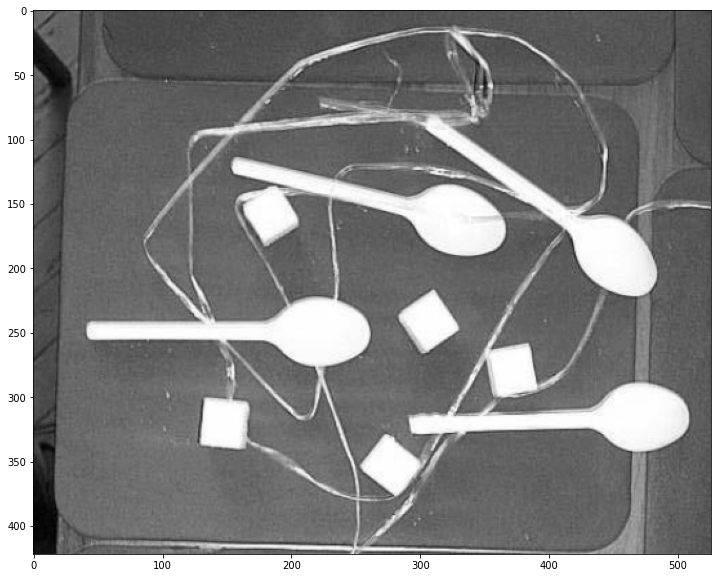

In [11]:
show(image)

Бинаризуем изображение и избавляемся от ненужных объектов с помощью морфологического открытия

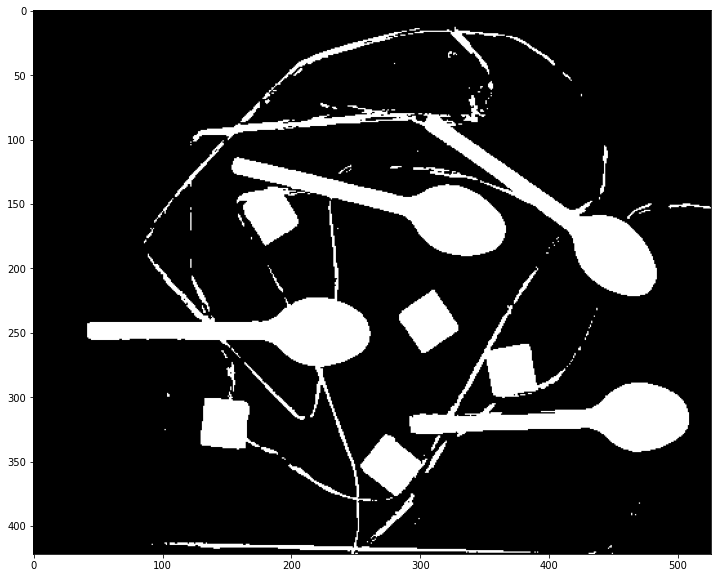

In [12]:
_, binmorph = cv.threshold(image, 0, 1, cv.THRESH_OTSU, cv.CV_32F)
show(binmorph)

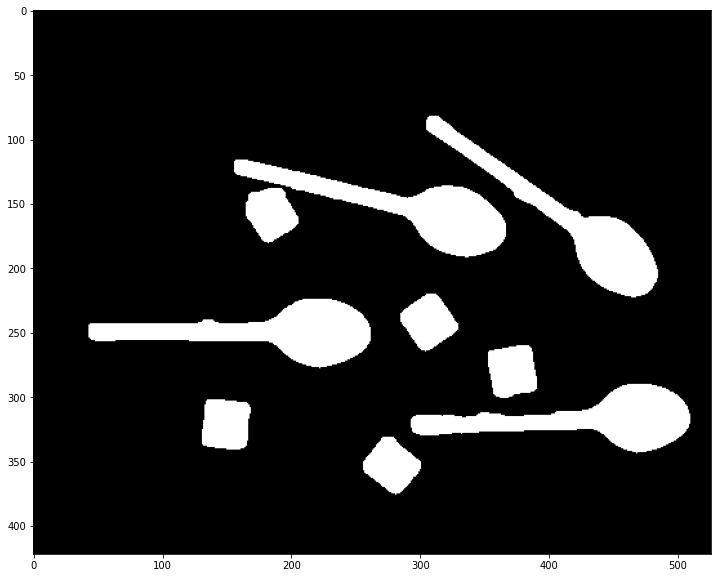

In [13]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (10, 10))
image3 = cv.morphologyEx(binmorph, cv.MORPH_OPEN, kernel)
show(image3)

Получаем общее количество поиском связных компонент

In [14]:
components_count = cv.connectedComponents(image3)[0] - 1
print(f'Всего {components_count} ложек и сахара')

Всего 9 ложек и сахара


Получаем количество отдельно кусочков сахара и ложек с помощью поиска контуров и алгоритма Дугласа-Пекера ( эпсилон зависит от периметра контура)

Кусочков сахара: 5 (зелёный цвет)
Ложек: 4 (синий цвет)
Красным цветом обозначены вершины контура - результата алгоритма Дугласа-Пекера


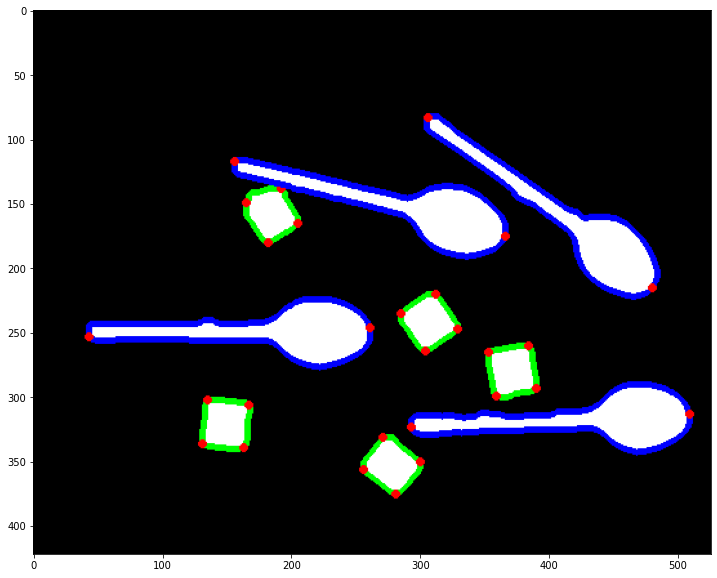

In [15]:
contours = cv.findContours(image3, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)[0]
image4 = cv.cvtColor(image3 * 255, cv.COLOR_GRAY2BGR)

sugar_count = 0
spoon_count = 0

for contour in contours:
    # Считаем периметр контура и epsilon для алгоритма Дугласа-Пекера.
    epsilon = 0.1 * cv.arcLength(contour, True)
    approximated_contour = cv.approxPolyDP(contour, epsilon, True)
    
    # Обозначим сахар зелёным цветом, а ложки - синим.
    if len(approximated_contour) == 4:
        color = (0, 255, 0)
        sugar_count += 1
    else:
        color = (0, 0, 255)
        spoon_count += 1
    
    # Рисуем точный контур нужным цветом.
    for i in range(len(contour)):
        point1 = tuple(contour[i - 1][0])
        point2 = tuple(contour[i][0])
        cv.line(image4, point1, point2, color, 3)
    
    # Рисуем вершины приближённого контура.
    for i in range(len(approximated_contour)):
        point = tuple(approximated_contour[i][0])
        cv.circle(image4, point, 2, (255, 0, 0), 2)
        
print(f'Кусочков сахара: {sugar_count} (зелёный цвет)')
print(f'Ложек: {spoon_count} (синий цвет)')
print('Красным цветом обозначены вершины контура - результата алгоритма Дугласа-Пекера')

show(image4)
